# Differentiation
This notebook is part of a collection of supplementary material designed to bring student up to speed on the mathematics required for COMP47750 Mathematics with Python.   
This notebook introduces differentiation on tabular data.  
This material is covered in the lecture **M2 Differentiation**. 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

A small dataset derived from GPS data.

In [30]:
route = pd.read_csv('route.csv', index_col = 'Time',
                   parse_dates=['Time'], infer_datetime_format=True)

/tmp/ipykernel_14727/2221049094.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  route = pd.read_csv('route.csv', index_col = 'Time',


In [28]:
route.head().round(2)

,Elevation,S,X,Y
Time,,,,
2021-05-08 11:43:27+00:00,162.8,3.05,-1.22,-2.79
2021-05-08 11:43:30+00:00,162.6,16.49,-10.01,-12.97
2021-05-08 11:43:32+00:00,162.0,26.83,-17.57,-20.02
2021-05-08 11:43:33+00:00,161.8,32.64,-21.91,-23.88
2021-05-08 11:43:36+00:00,160.8,50.60,-35.80,-35.25


In [29]:
# Calculate the change in elevation
route['dEl'] = route['Elevation'] - route['Elevation'].shift(1)

# Calculate the time delta in seconds, calculate the velocity.
route['TDelta'] = route.index.to_series().diff().astype('timedelta64[s]')
route['V']= route['S'].diff()/route['TDelta']

# Get the cumulated elapsed time in seconds
route['TimeSec'] = route['TDelta'].cumsum()
route.dropna(inplace = True) # Remove the row with the NaN

# Smooth out the noise
route['dElSmooth'] = route['dEl'].rolling(15, center = True).mean()
route['VSmooth'] = route['V'].rolling(15, center = True).mean() 

route.dropna(inplace = True) # Remove the rows with  NaNs

UFuncTypeError: ufunc 'divide' cannot use operands with types dtype('float64') and dtype('<m8[s]')

In [18]:
route.head(10)

,Elevation,S,X,Y,dEl,TDelta,TimeSec,dElSmooth,V,VSmooth
Time,,,,,,,,,,
2021-05-08 11:46:09+00:00,159.4,949.207873,-872.770185,-289.938848,1.0,0 days 00:00:03,0 days 00:00:19,0.186667,8.000000,7.116667
2021-05-08 11:46:13+00:00,160.8,978.283128,-901.236125,-284.019355,1.4,0 days 00:00:04,0 days 00:00:23,0.253333,7.250000,6.716667
2021-05-08 11:46:14+00:00,161.0,984.289660,-906.684684,-281.491513,0.2,0 days 00:00:01,0 days 00:00:24,0.346667,6.000000,6.366667
2021-05-08 11:46:16+00:00,161.8,995.233851,-916.247461,-276.169610,0.8,0 days 00:00:02,0 days 00:00:26,0.413333,5.000000,5.966667
2021-05-08 11:46:18+00:00,162.4,1004.952274,-924.587092,-271.180270,0.6,0 days 00:00:02,0 days 00:00:28,0.506667,4.500000,5.620000
2021-05-08 11:46:21+00:00,163.0,1019.132440,-934.594649,-261.134642,0.6,0 days 00:00:03,0 days 00:00:31,0.600000,4.666667,5.253333
2021-05-08 11:46:24+00:00,164.0,1031.983418,-945.158182,-253.816782,1.0,0 days 00:00:03,0 days 00:00:34,0.666667,4.000000,4.920000
2021-05-08 11:46:26+00:00,165.0,1040.013514,-952.163472,-249.891806,1.0,0 days 00:00:02,0 days 00:00:36,0.680000,4.000000,4.631111
2021-05-08 11:46:27+00:00,165.2,1043.641865,-955.388129,-248.228690,0.2,0 days 00:00:01,0 days 00:00:37,0.626667,3.000000,4.364444


Plot S (distance travelled) against elapsed time.

TypeError: The DType <class 'numpy.dtype[timedelta64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[timedelta64]'>, <class 'numpy.dtype[float64]'>)

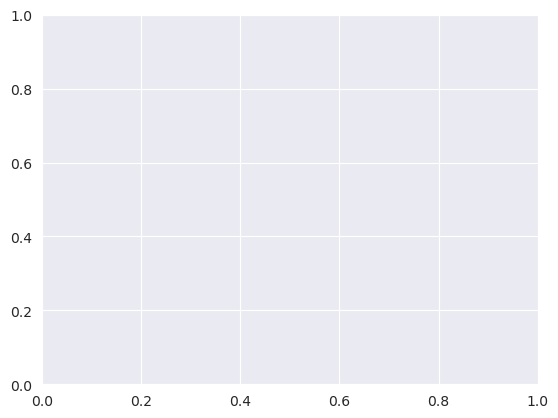

In [19]:
plt.scatter(route['TimeSec'],route['S'], s = 3)
plt.xlabel("t")
plt.ylabel("S")

Plot the smoothed velocity (first derivative of distance) against time. 

In [ ]:
plt.scatter(route['TimeSec'],route['VSmooth'], s = 3)
plt.ylim(0, 10)
plt.xlabel("t")
plt.ylabel("V")

### Elevation
Plots of elevation and changes in elevation against time and distance travelled.  
See lecture slides to see what these mean in terms of derivatives. 

TypeError: The DType <class 'numpy.dtype[timedelta64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[timedelta64]'>, <class 'numpy.dtype[float64]'>)

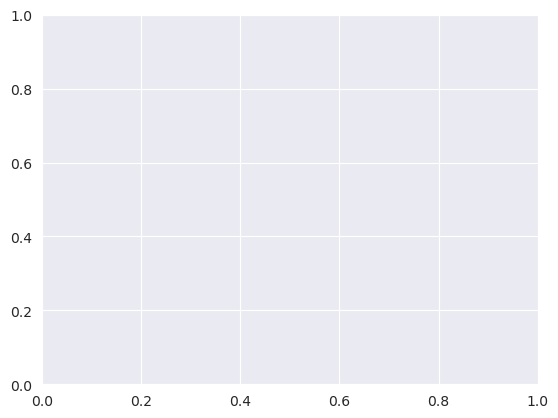

In [24]:
plt.scatter(route['TimeSec'],route['Elevation'], s = 3)
plt.xlabel("t")
plt.ylabel("Elevation")

In [ ]:
plt.scatter(route['TimeSec'],route['dElSmooth'], s = 3)
plt.xlabel("t")
plt.ylabel("Elevation Change")

In [ ]:
plt.scatter(route['S'],route['dElSmooth'], s = 3)
plt.xlabel("S")
plt.ylabel("Elevation Change")